# Data-X IEOR 290: HW 5
### Ankit Dutta
#### SID : 3032167048

# Theoretical Questions

### Q1: 
What could be some issues if the distribution of the test data is significantly different than the distribution of the training data?

# ---- Your Answer ---- #

It depends on the statistical significance of the difference between the distributions. 
This can lead to highly inaccurate prediction in the models, to avoid this, a shuffle split of the training and test data can be of great benefit.


### Q2:

What are some differences you would expect in a model that minimizes squared error, versus a model that minimizes absolute error? 

In which case would each error metric be appropriate?

# ---- Your Answer ---- #

If the difference between actual value and predicted value is large, the squared difference would be larger.
So, squared error approach penalizes large errors more as compared to absolute error approach. Therefore, if you want the model to penalize large errors more, minimizing squared error would be better. 

Large errors do not get magnified in case of absolute error approach, some points may be allowed to have large errors while most have comparatively small errors. 
So, a model learnt by minimizing absolute error might have more variance in the error values for the training samples, whereas a model which minimizes squared error would tend to learn a model where errors do not vary a lot (or are closer to the mean of the error values). Implying that if there are more outliers, or more noise in target values, minimizing absolute error would be better.


### Q3:

What error metric would you use to evaluate how good a binary classifier is?

What if the classes are imbalanced?

What if there are more than 2 groups?

# ---- Your Answer ---- #

For balanced classes:
Accuracy in Percent, i.e. how many times the model predicts correctly (where the percentage of wrong predictions equals 1-accuracy)

For imbalanced classes:
Sensitivity and Specificity
Precision and Recall

For multi-class:
accuracy score and use confusion matrix to understand better how (i.e. for which classes) the model predicts wrong

### Q4: 

Why might it be preferable to include fewer predictors over many?


# ---- Your Answer ---- #

To prevent overfitting

# Programming Homework

### Question: Forest Cover Type Prediction

###### Focus: Multi-Class Classification

In the second part of this week's programming homework, you are tasked to develop a classification system to classify forest categories.

The interesting part of the dataset is that the predictors are all cartographic rather than remotely sensed data. 

Data is available at:  https://www.kaggle.com/c/forest-cover-type-prediction

* train.csv : the file provides both the predictors and response varaible
* test.csv  : the file provides predictors
* sampleSubmission.csv: the file provides the format that we expect you to provide

Your task:
* Understand and visualize the data collected by the US Forest Service
* Build a classifier which can accurately classify the forest cover

Hints:
* Always start with a data walk (i.e. visualization, data exploration) 
* Consider standardizing the predictors
* Always consider a simple model
* Consider feature engineering
* Always use Cross Validation to conduct model selection
* Pandas (a python package) has functions to deal with timestamps effectively





In [94]:
# ---- Your Answer ---- #
#MAKE PLOTS APPEAR INLINE IN THE NOTEBOOK
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
import scipy
#LARGER AND NICER PLOTS
#plt.rc("savefig",dpi=200)
#plt.rcParams['patch.linewidth']=0

#SET DEFAULT STYLE TO GGPLOT AS IN R
plt.style.use('ggplot')

#To display all the columns
pd.set_option('display.max_columns', None) 


In [81]:
#storing the datasets into pandas dataframe

trainset=pd.read_csv('train.csv')
testset=pd.read_csv('test.csv')
trainset.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [82]:
#dropping column id
ID = testset['Id']
trainset=trainset.drop(['Id'],axis=1)
testset=testset.drop('Id',axis=1)

In [83]:
trainset.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,0.0,0.000066,0.000661,0.141667,0.026852,0.015013,0.031481,0.011177,0.0,0.007540,0.040476,0.003968,0.003042,0.009193,0.001058,0.022817,0.050066,0.016997,0.000066,0.003571,0.000992,0.000595,0.085384,0.047950,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,0.0,0.008133,0.025710,0.348719,0.161656,0.121609,0.174621,0.105133,0.0,0.086506,0.197080,0.062871,0.055075,0.095442,0.032514,0.149326,0.218089,0.129265,0.008133,0.059657,0.031482,0.024391,0.279461,0.213667,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.00000

In [84]:
trainset.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [85]:
#Checking the size of the data for each cover type
print(trainset.groupby('Cover_Type').size())

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64


In [86]:
#Removing columns with standard deviation as zero
std=[]
for i in trainset.columns:
    if trainset[i].std() == 0:
        std.append(i)
   
trainset.drop(std,axis=1,inplace=True)

print(std)

['Soil_Type7', 'Soil_Type15']


In [87]:
testset=testset.drop('Soil_Type7',axis=1)
testset=testset.drop('Soil_Type15',axis=1)
test_norm=testset

## Exploratory Data Visualization

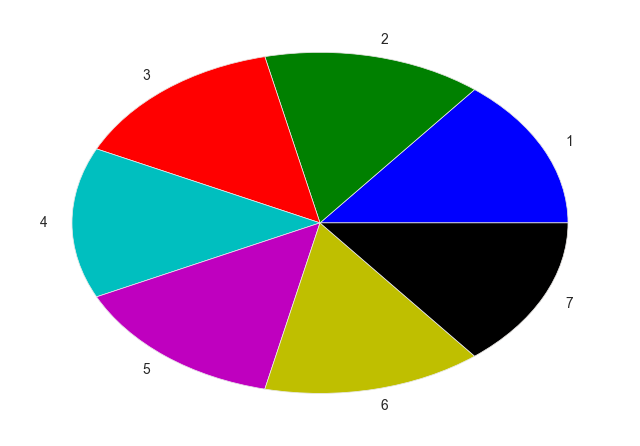

In [14]:
labels = '1','2','3','4','5','6','7'
colors = ['gold','lightcoral','orangered','papayawhip','darkorchid','lightsteelblue','sandybrown']
#explode = (0.1, 0) 
ct=(trainset.groupby('Cover_Type').size)
ctd=pd.DataFrame(ct())
plt.pie(ctd,labels=labels,colors=colors)
plt.pie(ctd)
plt.show()


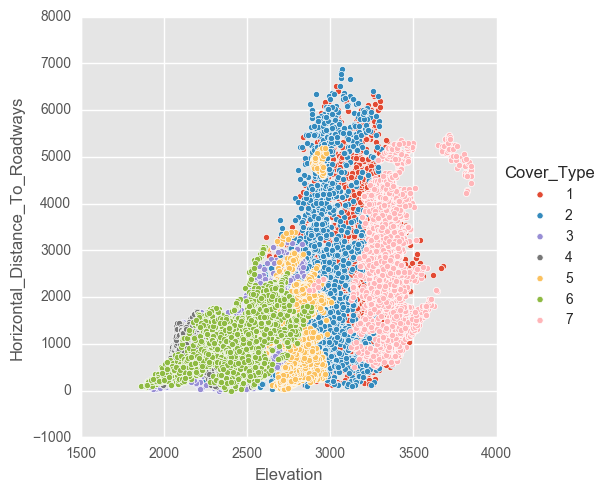

In [34]:
sns.pairplot(trainset, hue='Cover_Type',size=5,x_vars='Elevation',y_vars='Horizontal_Distance_To_Roadways')

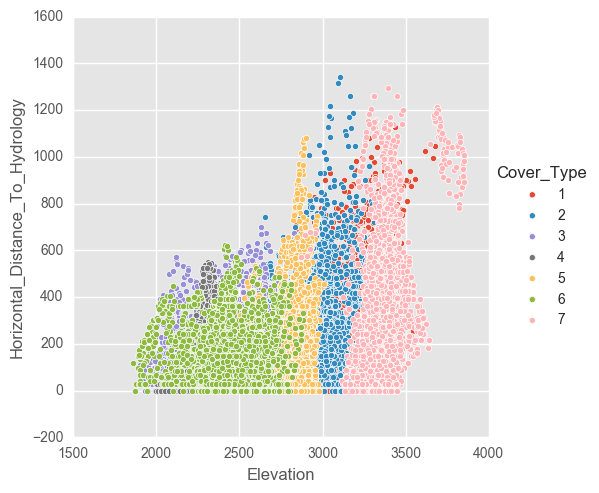

In [35]:
sns.pairplot(trainset, hue='Cover_Type',size=5,x_vars='Elevation',y_vars='Horizontal_Distance_To_Hydrology')

In [17]:
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn import cross_validation


C:\Program Files\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:


X=trainset.drop('Cover_Type',axis=1).reset_index().drop('index',axis=1) # all rows, no label
y=trainset['Cover_Type']  # all rows, label only

X_train, X_val, y_train, y_val = cross_validation.train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
X_train.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000,12096.000000
mean,2750.967593,156.839616,16.472222,226.316138,50.805308,1716.931052,212.590195,218.970486,135.253968,1516.062583,0.240327,0.032325,0.419643,0.307705,0.022900,0.042163,0.062252,0.055473,0.011078,0.043155,0.000083,0.000744,0.142692,0.027530,0.014385,0.031829,0.010334,0.007358,0.039187,0.003638,0.002894,0.009342,0.001075,0.022321,0.049686,0.016782,0.000083,0.003638,0.001075,0.000661,0.087715,0.048942,0.022321,0.046296,0.040675,0.001240,0.006283,0.000744,0.002232,0.047784,0.043320,0.030093
std,415.253352,110.399963,8.435906,208.272582,60.660339,1329.485686,30.601772,22.752609,45.956938,1101.063796,0.427300,0.176868,0.493521,0.461563,0.149591,0.200969,0.241623,0.228910,0.104672,0.203214,0.009092,0.027268,0.349773,0.163628,0.119076,0.175551,0.101134,0.085465,0.194046,0.060205,0.053716,0.096205,0.032767,0.147733,0.217304,0.128461,0.009092,0.060205,0.032767,0.025710,0.282892,0.215755,0.147733,0.210135,0.197543,0.035194,0.079020,0.027268,0.047195,0.213319,0.203585,0.170849
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2379.750000,64.000000,10.000000,67.000000,5.000000,755.000000,196.000000,207.000000,106.000000,731.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2751.000000,125.000000,15.000000,180.000000,32.000000,1310.000000,220.000000,223.000000,138.000000,1265.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3102.000000,262.000000,22.000000,324.000000,80.000000,2271.000000,235.000000,235.000000,167.000000,1992.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.

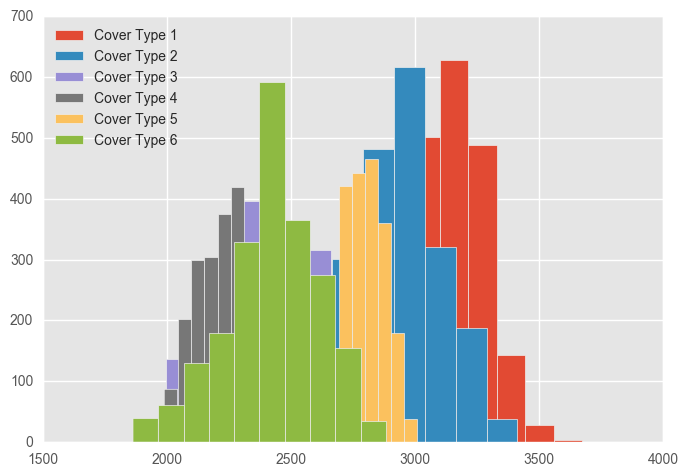

In [36]:
for i in range(1,7):
    plt.hist(list(X['Elevation'][y==i]),label='Cover Type %s' %i)
plt.legend(loc='upper left')
plt.show()

# Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [38]:
rfclass=RandomForestClassifier()
rfclvfit=rfclass.fit(X_train,y_train)

In [39]:
yv_pred=rfclvfit.predict(X_val)
testresult=rfclvfit.predict(testset)

In [43]:

accuracy_test_set = accuracy_score(y_val,yv_pred)
accuracy_test_set*100

84.391534391534393

In [44]:
mean_squared_error(y_val, yv_pred)


1.2162698412698412

In [45]:
print(classification_report(y_val, yv_pred))


             precision    recall  f1-score   support

          1       0.73      0.76      0.75       421
          2       0.76      0.64      0.70       438
          3       0.79      0.82      0.80       428
          4       0.93      0.98      0.95       449
          5       0.89      0.94      0.91       416
          6       0.85      0.81      0.83       432
          7       0.95      0.95      0.95       440

avg / total       0.84      0.84      0.84      3024



In [46]:
cm = pd.DataFrame(confusion_matrix(y_val, yv_pred).T)
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,0,1,2,3,4,5,6
Predicted,,,,,,,
0,322,102,0,0,0,0,19
1,63,281,4,0,14,4,2
2,0,18,351,5,9,63,0
3,0,0,20,440,0,13,0
4,15,29,3,0,390,3,0
5,0,6,50,4,3,349,0
6,21,2,0,0,0,0,419


In [47]:
with open("randomforest.csv", "w") as subfile:
    subfile.write("Id,Cover_Type\n")
    for i, pred in enumerate(list(testresult)):
        subfile.write("%s,%s\n"%(ID[i],pred))

# Kaggle Score:- Your submission scored 0.70032.


## Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
clf=DecisionTreeClassifier()

In [50]:
dtclassfit=clf.fit(X_train,y_train)
yvpred=dtclassfit.predict(X_val)
accuracy_test_set = accuracy_score(y_val,yvpred)
accuracy_test_set

0.79199735449735453

In [51]:
testresult=dtclassfit.predict(testset) 

In [53]:
print(classification_report(y_val, yvpred))


             precision    recall  f1-score   support

          1       0.65      0.68      0.67       421
          2       0.65      0.60      0.62       438
          3       0.77      0.75      0.76       428
          4       0.92      0.95      0.93       449
          5       0.85      0.89      0.87       416
          6       0.78      0.77      0.77       432
          7       0.91      0.90      0.91       440

avg / total       0.79      0.79      0.79      3024



In [54]:
cm = pd.DataFrame(confusion_matrix(y_val, yvpred).T)
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,0,1,2,3,4,5,6
Predicted,,,,,,,
0,288,107,0,0,6,3,39
1,93,261,7,0,26,11,3
2,0,10,320,16,8,63,1
3,0,0,23,425,0,16,0
4,7,45,6,0,370,5,0
5,0,10,72,8,6,334,0
6,33,5,0,0,0,0,397


In [55]:
with open("decisiontree.csv", "w") as subfile:
    subfile.write("Id,Cover_Type\n")
    for i, pred in enumerate(list(testresult)):
        subfile.write("%s,%s\n"%(ID[i],pred))

# Your submission scored 0.65812-- Decision tree

# Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression


In [57]:
lor = LogisticRegression(C=1e5)
lorfit=lor.fit(X_train, y_train)
yvlor=lorfit.predict(X_val)
accuracy_test_set = accuracy_score(y_val,yvlor)
lortestresult=lorfit.predict(testset) 
accuracy_test_set

0.67361111111111116

In [58]:
mean_squared_error(y_val, yvlor)


2.7361111111111112

In [59]:
print(classification_report(y_val, yvlor))


             precision    recall  f1-score   support

          1       0.64      0.65      0.65       421
          2       0.61      0.49      0.54       438
          3       0.57      0.48      0.52       428
          4       0.76      0.90      0.82       449
          5       0.62      0.73      0.67       416
          6       0.58      0.57      0.58       432
          7       0.89      0.89      0.89       440

avg / total       0.67      0.67      0.67      3024



In [60]:
cm = pd.DataFrame(confusion_matrix(y_val, yvlor).T)
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,0,1,2,3,4,5,6
Predicted,,,,,,,
0,273,99,0,0,11,1,40
1,73,213,4,0,47,12,3
2,2,12,206,33,32,72,2
3,0,2,70,402,0,54,0
4,31,93,15,0,304,46,3
5,1,10,133,14,22,247,0
6,41,9,0,0,0,0,392


In [61]:
with open("logistic.csv", "w") as subfile:
    subfile.write("Id,Cover_Type\n")
    for i, pred in enumerate(list(lortestresult)):
        subfile.write("%s,%s\n"%(ID[i],pred))

# Kaggle- Your submission scored 0.54945.


# Feature Engineered Random Forest

In [62]:
X=trainset.drop('Cover_Type',axis=1).reset_index().drop('index',axis=1) # all rows, no label
y=trainset['Cover_Type']
# feature engineering
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures


####2 way Feature Interaction is used below######

combos = list(combinations(list(X.columns),2))
colnames = list(X.columns) + ['_'.join(X) for X in combos]

# create interactions
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X= poly.fit_transform(X)
X = pd.DataFrame(X)
X.columns = colnames

noint_indicies = [i for i, X in enumerate(list((X == 0).all())) if X]
x = X.drop(X.columns[noint_indicies], axis=1)

In [63]:
###2 way interaction for the given test data####

combos = list(combinations(list(testset.columns),2))
colnames = list(testset.columns) + ['_'.join(i) for i in combos]

# creating interactions
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
testset = poly.fit_transform(testset)
testset = pd.DataFrame(testset)
testset.columns = colnames

noint_indicies = [i for i, z in enumerate(list((testset == 0).all())) if z]
testset = testset.drop(testset.columns[noint_indicies], axis=1)

In [64]:
#Creating training and validation sets for the feature engineered values####

import sklearn.feature_selection
from sklearn import cross_validation


x_train, x_val, y_train, y_val = cross_validation.train_test_split(x, y, test_size=0.2, random_state=42)

select = sklearn.feature_selection.SelectKBest(k=100)
selected_features = select.fit(x_train, y_train)
indices_selected = selected_features.get_support(indices=True)
colnames_selected = [x_train.columns[i] for i in indices_selected]

x_train_selected = x_train[colnames_selected]
x_val_selected = x_val[colnames_selected]

test_selected = testset[colnames_selected]



In [65]:
rf = RandomForestClassifier()
rf_fit = rf.fit(x_train_selected, y_train)
rf_valpred=rf_fit.predict(x_val_selected)
testsetres=rf_fit.predict(test_selected)
print(testsetres)


[1 2 1 ..., 3 3 3]


In [66]:
print(classification_report(y_val, rf_valpred))


             precision    recall  f1-score   support

          1       0.76      0.78      0.77       421
          2       0.77      0.66      0.71       438
          3       0.83      0.84      0.84       428
          4       0.92      0.97      0.95       449
          5       0.89      0.94      0.91       416
          6       0.86      0.84      0.85       432
          7       0.95      0.96      0.95       440

avg / total       0.85      0.86      0.85      3024



In [67]:
cm = pd.DataFrame(confusion_matrix(y_val, rf_valpred).T)
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,0,1,2,3,4,5,6
Predicted,,,,,,,
0,328,88,0,0,2,0,15
1,63,289,4,0,13,6,1
2,0,16,360,8,8,42,0
3,0,0,18,436,0,19,0
4,8,36,2,0,390,2,0
5,0,7,44,5,3,363,0
6,22,2,0,0,0,0,424


In [68]:
with open("randomforest100.csv", "w") as subfile:
    subfile.write("Id,Cover_Type\n")
    for i, pred in enumerate(list(testsetres)):
        subfile.write("%s,%s\n"%(ID[i],pred))


# Your submission scored 0.71341.


# With Normalizing Data

In [69]:
df_norm=trainset.drop('Cover_Type',axis=1)
for i in df_norm.columns:
    df_norm[i]=(df_norm[i]-(df_norm[i].mean()))/(df_norm[i].max()-df_norm[i].min())


In [70]:
df_norm.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,-0.077202,-0.293546,-0.259646,0.022937,-0.072966,-0.174749,0.032660,0.084093,0.052048,0.681804,0.762103,-0.033003,-0.419907,-0.309193,-0.023479,-0.041204,-0.063624,-0.055754,-0.010913,-0.042989,-0.000066,-0.000661,-0.141667,-0.026852,-0.015013,-0.031481,-0.011177,-0.00754,-0.040476,-0.003968,-0.003042,-0.009193,-0.001058,-0.022817,-0.050066,-0.016997,-0.000066,-0.003571,-0.000992,-0.000595,0.914616,-0.04795,-0.021958,-0.045635,-0.040741,-0.001455,-0.006746,-0.000661,-0.002249,-0.048148,-0.043452,-0.030357
1,-0.080223,-0.279657,-0.278877,-0.011315,-0.081538,-0.192166,0.028723,0.103448,0.064145,0.674082,0.762103,-0.033003,-0.419907,-0.309193,-0.023479,-0.041204,-0.063624,-0.055754,-0.010913,-0.042989,-0.000066,-0.000661,-0.141667,-0.026852,-0.015013,-0.031481,-0.011177,-0.00754,-0.040476,-0.003968,-0.003042,-0.009193,-0.001058,-0.022817,-0.050066,-0.016997,-0.000066,-0.003571,-0.000992,-0.000595,0.914616,-0.04795,-0.021958,-0.045635,-0.040741,-0.001455,-0.006746,-0.000661,-0.002249,-0.048148,-0.043452,-0.030357
2,0.027531,-0.049102,-0.144261,0.030383,0.019891,0.212769,0.083841,0.122803,-0.000371,0.659210,0.762103,-0.033003,-0.419907,-0.309193,-0.023479,-0.041204,-0.063624,-0.055754,-0.010913,-0.042989,-0.000066,-0.000661,-0.141667,-0.026852,0.984987,-0.031481,-0.011177,-0.00754,-0.040476,-0.003968,-0.003042,-0.009193,-0.001058,-0.022817,-0.050066,-0.016997,-0.000066,-0.003571,-0.000992,-0.000595,-0.085384,-0.04795,-0.021958,-0.045635,-0.040741,-0.001455,-0.006746,-0.000661,-0.002249,-0.048148,-0.043452,-0.030357
3,0.017964,-0.004657,0.028816,0.011023,0.095605,0.199706,0.099589,0.122803,-0.052790,0.672080,0.762103,-0.033003,-0.419907,-0.309193,-0.023479,-0.041204,-0.063624,-0.055754,-0.010913,-0.042989,-0.000066,-0.000661,-0.141667,-0.026852,-0.015013,-0.031481,-0.011177,-0.00754,-0.040476,-0.003968,-0.003042,-0.009193,-0.001058,-0.022817,-0.050066,-0.016997,-0.000066,-0.003571,-0.000992,-0.000595,-0.085384,0.95205,-0.021958,-0.045635,-0.040741,-0.001455,-0.006746,-0.000661,-0.002249,-0.048148,-0.043452,-0.030357
4,-0.077705,-0.310213,-0.278877,-0.055246,-0.074395,-0.192021,0.028723,0.096996,0.060113,0.666503,0.762103,-0.033003,-0.419907,-0.309193,-0.023479,-0.041204,-0.063624,-0.055754,-0.010913,-0.042989,-0.000066,-0.000661,-0.141667,-0.026852,-0.015013,-0.031481,-0.011177,-0.00754,-0.040476,-0.003968,-0.003042,-0.009193,-0.001058,-0.022817,-0.050066,-0.016997,-0.000066,-0.003571,-0.000992,-0.000595,0.914616,-0.04795,-0.021958,-0.045635,-0.040741,-0.001455,-0.006746,-0.000661,-0.002249,-0.048148,-0.043452,-0.030357


In [71]:
from sklearn import cross_validation

Xp=df_norm.reset_index().drop('index',axis=1) # all rows, no label
yp=trainset['Cover_Type']  # all rows, label only

Xp_train, Xp_test, yp_train, yp_test = cross_validation.train_test_split(Xp, yp, test_size=0.20, random_state=42)

In [72]:
X_train.shape

(12096, 52)

In [73]:
rfclass=RandomForestClassifier()
rfclfit=rfclass.fit(Xp_train,yp_train)

In [74]:
y_pred=rfclfit.predict(Xp_test)

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix

ytp=pd.DataFrame(yp_test)
accuracy_test_set = accuracy_score(ytp,y_pred)
accuracy_test_set

0.84292328042328046

In [77]:
print(classification_report(ytp,y_pred))


             precision    recall  f1-score   support

          1       0.71      0.76      0.74       421
          2       0.76      0.64      0.70       438
          3       0.80      0.82      0.81       428
          4       0.91      0.98      0.94       449
          5       0.90      0.95      0.92       416
          6       0.84      0.80      0.82       432
          7       0.95      0.95      0.95       440

avg / total       0.84      0.84      0.84      3024



In [78]:
cm = pd.DataFrame(confusion_matrix(ytp,y_pred).T)
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,0,1,2,3,4,5,6
Predicted,,,,,,,
0,321,107,0,0,0,2,20
1,68,281,2,0,11,6,1
2,0,15,349,5,8,57,0
3,0,0,24,439,0,20,0
4,12,29,2,0,394,1,0
5,0,5,51,5,3,346,0
6,20,1,0,0,0,0,419


In [88]:
for i in test_norm.columns:
    test_norm[i]=(test_norm[i]-(test_norm[i].mean()))/(test_norm[i].max()-test_norm[i].min())

In [89]:
ytnpred=rfclfit.predict(test_norm)

In [90]:
with open("normalizedrandom.csv", "w") as subfile:
    subfile.write("Id,Cover_Type\n")
    for i, pred in enumerate(list(ytnpred)):
        subfile.write("%s,%s\n"%(ID[i],pred))

# Learning Curve

In [91]:
###SOURCE---- http://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py#############################
###The below code is a modification of the code found online#######
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=5, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv,n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.grid()

    return plt

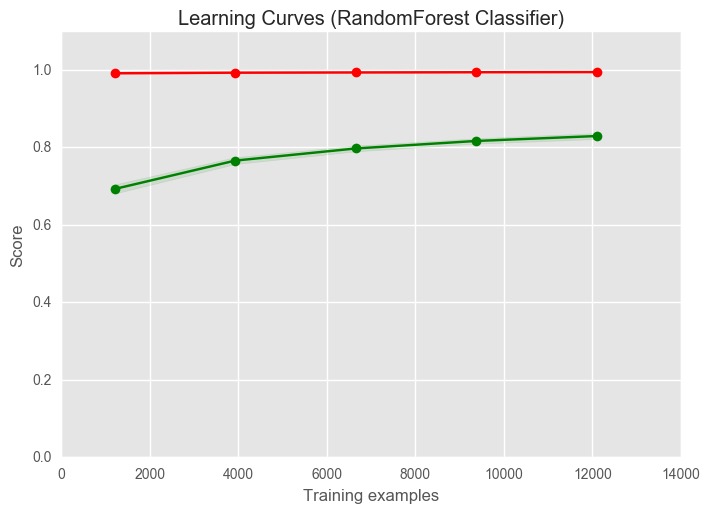

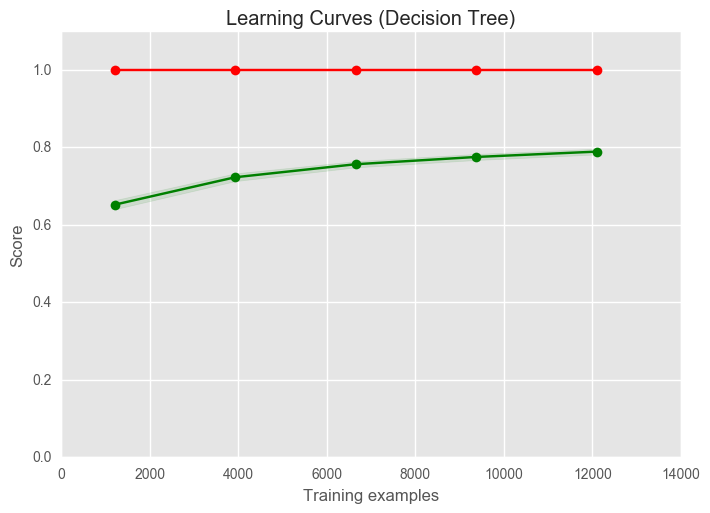

In [92]:
title = "Learning Curves (RandomForest Classifier)"
# Cross validation with 100 iterations to get smoother mean test and train
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestClassifier()

plot_learning_curve(estimator, title, X, y, ylim=(0, 1.1), cv=cv,n_jobs=5)
plt.grid()

title = "Learning Curves (Decision Tree)"

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = DecisionTreeClassifier()
plot_learning_curve(estimator, title, X, y, (0, 1.1), cv=cv,n_jobs=5)
plt.grid()
plt.show()

## Prioject Homework

0. Create and turn in a "Product Requirement Document" that has these items in it.

1. Include 2 prioritized lists of requirements:

    * user requirements, mark items where you have low confidence
    * technical requirements, mark items where you have low confidence

2. Decide how you will validate user requirements which you are not sure about?

3. Decide how you will learn and test techcical challenges that you are not sure thatyou can achieve at this time.

4. Whiteboard or draw an architecture and/or data model based on what you know.  Take a picture of it and include it in the document

5. Make your list of what should be done in the next week, assign names to each item.

6. Insert your low tech demo picture (possibly modified) into this document

Turn in this document and also start a folder for your project and save it for your own review later.




## Extra Credit: Forecasting Bike Sharing Demand 

###### Focus: Regression and Feature Engineering

In this week's programming homework, you are tasked to develop a forecasting system for the use of a city bikeshare system. 

The question is based on a for-knowledge competition hosted on Kaggle: 
Reference: Fanaee-T, Hadi, and Gamo, Joao, Event labeling combining detectors and background knowledge, Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg.

Data is available at: https://www.kaggle.com/c/bike-sharing-demand

3 files are provided:
* train.csv : the file provides both the predictors and response varaible
* test.csv  : the file provides predictors
* sampleSubmission.csv: the file provides the format that we expect you to provide

Your task:
* Understand and visualize the data generated by bike sharing systems
* Predict the number of total rentals in each time period during the test phase

Hints: 
* Always start with a data walk (i.e. visualization, data exploration) 
* Consider standardizing the predictors
* Always consider a simple model
* Consider feature engineering
* Always use Cross Validation to conduct model selection
* Pandas (a python package) has functions to deal with timestamps effectively


